In [ ]:
import numpy as np

# Define the L(n) function
def L(n,p):
    return np.log(n) / np.log(1/p) 

# Define the expected value of the search path cost
def expected(n,p):
    return L(n,p)/p + 1/(1-p)

# Define a range for x values that will be used to query the PMFs of the distributions
# Shifted by -L(n,p) to account for constant part in probabilistic upper bound (PMF(x) is actually PMF(x-L(n,p) because of constant shift)
x = np.arange(-L(n,p), 100)  

# Example values for n and p
n = 256 
p = 0.5  

: 

In [2]:
import scipy.stats as stats

# Define the function to calculate the PDF of the combined distribution
def calculate_combined_pmf(n, p, x):

    # Negative Binomial distribution NB(L(n) - 1, p) at point x
    nb1 = stats.nbinom.pmf(x, L(n,p) - 1, p)

    # Binomial distribution B(n, 1/(n*p)) at point x
    binom = stats.binom.pmf(x, n, 1/(n*p))

    # Negative Binomial distribution NB(1, 1 - p) at point x
    nb2 = stats.nbinom.pmf(x, 1, 1 - p)

    # Convolve the PMFs to construct the combined PMF (for the sum of the two distributions)
    combined_pmf_1 = np.convolve(nb1, binom)
    combined_pmf_2 = np.convolve(combined_pmf_1, nb2)

    return combined_pmf_2

calculate_combined_pmf(n,p,x)

((322,),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        5.24517967e-004, 3.15536793e-003, 1.00113046e-002, 2.23369077e-002,
        3.94137347e-002, 5.86287493e-002, 7.65162375e-002, 9.00209240e-002,
        9.73441688e-002, 9.81587997e-002, 9.33278327e-002, 8.43968382e-002,
        7.30944873e-002, 6.09715496e-002, 4.92106291e-002, 3.85785113e-002,
        2.94703215e-002, 2.19968738e-002, 1.60799356e-002, 1.15351676e-002,
        8.13452242e-003, 5.64760085e-003, 3.86539285e-003, 2.61111695e-003,
        1.74264586e-003, 1.15011010e-003, 7.51227985e-004, 4.85986113e-004,
   

In [3]:
# Define the function to calculate the CDF of the combined distribution (using the PMF)
def calculate_cdf(n, p, x):
    pmf = calculate_combined_pmf(n, p, x)
    cdf = np.cumsum(pmf)
    return cdf

calculate_cdf(n, p, x)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.24517967e-04, 3.67988590e-03, 1.36911905e-02, 3.60280982e-02,
       7.54418329e-02, 1.34070582e-01, 2.10586820e-01, 3.00607744e-01,
       3.97951913e-01, 4.96110712e-01, 5.89438545e-01, 6.73835383e-01,
       7.46929870e-01, 8.07901420e-01, 8.57112049e-01, 8.95690560e-01,
       9.25160882e-01, 9.47157756e-01, 9.63237691e-01, 9.74772859e-01,
       9.82907381e-01, 9.88554982e-01, 9.92420375e-01, 9.95031492e-01,
       9.96774138e-01, 9.97924248e-01, 9.98675476e-01, 9.99161462e-01,
       9.99473050e-01, 9.99671159e-01, 9.99796132e-01, 9.99874393e-01,
      

In [4]:
# Define the function to calculate 1 - CDF to get the probability of exceeding the (expected) search path cost
def calculate_exceeding_probability(n, p, x):
    cumulative_probability = calculate_cdf(n, p, x)
    exceeding_probability = 1 - cumulative_probability
    return exceeding_probability

calculate_exceeding_probability(n, p, x)

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99475482e-01, 9.96320114e-01, 9.86308810e-01, 9.63971902e-01,
       9.24558167e-01, 8.65929418e-01, 7.89413180e-01, 6.99392256e-01,
       6.02048087e-01, 5.03889288e-01, 4.10561455e-01, 3.26164617e-01,
       2.53070130e-01, 1.92098580e-01, 1.42887951e-01, 1.04309440e-01,
       7.48391181e-02, 5.28422443e-02, 3.67623087e-02, 2.52271411e-02,
       1.70926187e-02, 1.14450179e-02, 7.57962502e-03, 4.96850808e-03,
       3.22586222e-03, 2.07575212e-03, 1.32452414e-03, 8.38538026e-04,
       5.26949542e-04, 3.28841483e-04, 2.03867551e-04, 1.25606597e-04,
      

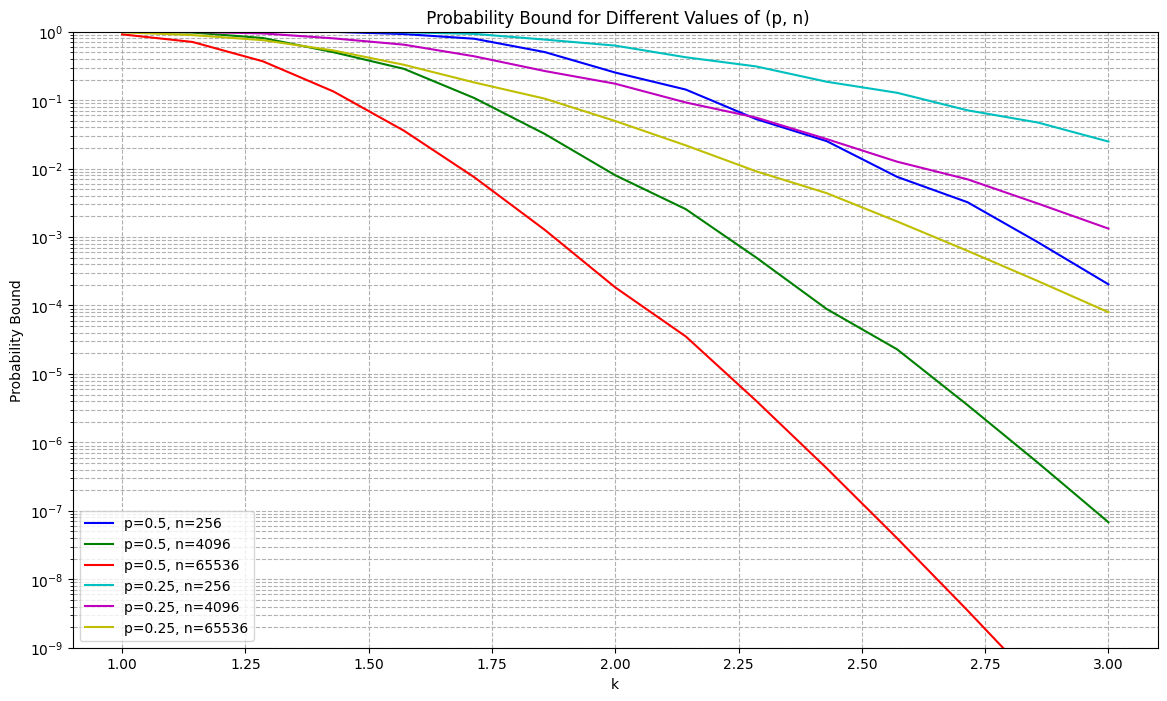

In [5]:
import matplotlib.pyplot as plt

# Define the combinations of (p, n) to be plotted
combinations = [
    (1/2, 256), (1/2, 4096), (1/2, 65536),
    (1/4, 256), (1/4, 4096), (1/4, 65536)
]

# Define the all the values between 1 and 3 that will be plotted times the expected value
k_values = np.linspace(1, 3, 15)

# Calculate the probability bounds for all the combinations of (p, n)
bound = {(p,n): [calculate_exceeding_probability(n, p, x)[int(k*expected(n,p))] for k in k_values] for p, n in combinations}

# Actual plotting starts here
plt.figure(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for (p, n), color in zip(combinations, colors):
    plt.plot(k_values, bound[(p,n)], label=f'p={p}, n={n}', color=color)

plt.yscale('log')
plt.ylim(1e-9, 1)
plt.xlabel('k')
plt.ylabel('Probability Bound')
plt.title(' Probability Bound for Different Values of (p, n)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()